#### Augmenting list of build dependencies:

- used to address build isolation issue for certain packages that require the same version
- allows you to install a package in an isolated environment, but with additional build dependencies that are not declared by the package itself via the ```extra-build-dependencies```

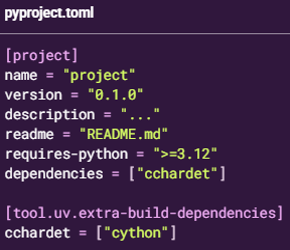

In [3]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/augment.png')
new_image = img.resize((290, 250))
display(new_image)

To ensure that a build dependency matches the version of the package that is or will be installed in the project environment, set match-runtime = true in the extra-build-dependencies table

- eg: to build ```deepspeed``` with ```torch``` as an additional build dependency, include the following in your ```pyproject.toml```
    - ensures that deepspeed is built with the same version of torch that is installed in the project environment

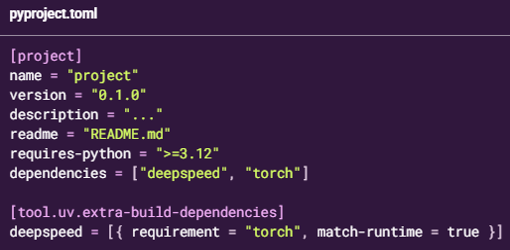

In [4]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/augment1.png')
new_image = img.resize((510, 250))
display(new_image)

- similarly, ```flash-attn```

Note:
- ```FLASH_ATTENTION_SKIP_CUDA_BUILD``` environment variable ensures that ```flash-attn``` is installed from a compatible, <b>pre-built wheel</b>, rather than attempting to build it from source, which requires access to the CUDA development toolkit. 
- if the ```CUDA toolkit``` is not available, the environment variable can be omitted, and ```flash-attn``` will be installed from a pre-built wheel if one is available for the current platform, Python version, and PyTorch version

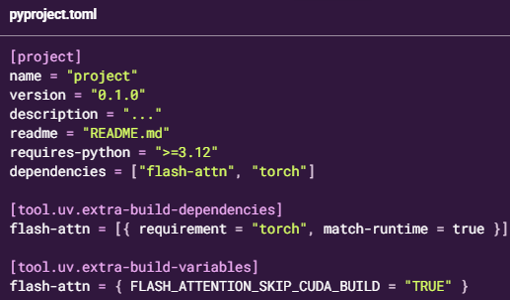

In [5]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/augment3.png')
new_image = img.resize((510, 300))
display(new_image)

- similarly, ```deep_gem```

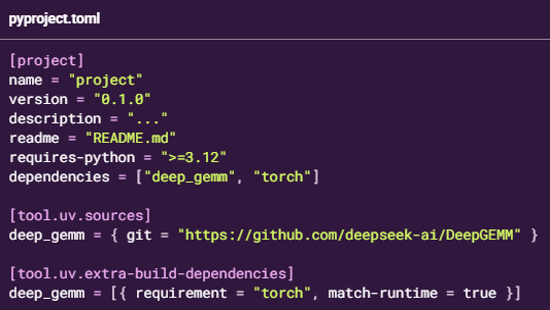

In [6]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/augment2.png')
new_image = img.resize((550, 310))
display(new_image)

Note:
- use of ```extra-build-dependencies``` and ```extra-build-variables``` are tracked in the uv cache, such that changes to these settings will trigger a reinstall and rebuild of the affected packages
- eg: in case of ```flash-attn```, upgrading the version of ```torch``` used in your project would subsequently trigger a rebuild of ```flash-attn``` with the new version of ```torch```

#### Dynamic Metadata:

- use of ```match-runtime = true``` is only for static metadata eg ```flash-attn```
    - ```uv``` is required to build the package during the dependency resolution phase
    - ```flash-attn``` did not declare static metadata, ```uv``` would not be able to determine the version of ```torch``` that would be installed in the project environment, since it would need to build ```flash-attn``` prior to resolving the ```torch``` version

- ```axolotl``` is a popular package that requires <b>augmented build dependencies</b>, but does not declare <b>static metadata</b>, as the package's dependencies vary based on the version of ```torch``` that is installed in the project environment. 
    - in this case, users should instead specify the exact version of ```torch``` that they intend to use in their project, and then augment the build dependencies with that version

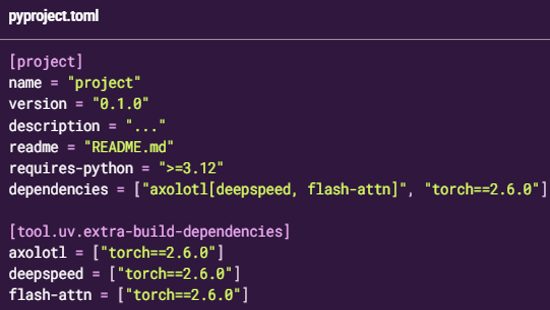

In [7]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/augment4.png')
new_image = img.resize((550, 310))
display(new_image)

- similarly, older versions of ```flash-attn``` did not declare static metadata, and thus would not have supported ```match-runtime = true``` out of the box. 
- Unlike ```axolotl```, though, ```flash-attn``` did not vary its dependencies based on dynamic properties of the build environment. 
- As such, users could instead provide the ```flash-attn``` metadata upfront via the ```dependency-metadata``` setting
    - The version field in ```tool.uv.dependency-metadata``` is optional for registry-based dependencies (when omitted, uv will assume the metadata applies to all versions of the package)
    - but required for direct URL dependencies (like Git dependencies)

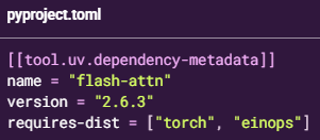

: 

In [ ]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/augment5.png')
new_image = img.resize((320, 140))
display(new_image)

Note:
- To determine the package metadata for a package like ```flash-attn```, navigate to the appropriate Git repository, or look it up on ```PyPI``` and download the package's source distribution. The package requirements can typically be found in the ```setup.py``` or ```setup.cfg``` file.